
# Titanic 



In [145]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import seaborn
import matplotlib.pyplot as pplot
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


from sklearn import datasets 
titanic_train = pd.read_csv('C:/Users/Moran/Documents/titanic.csv')
titanic_test=titanic_train.copy()
titanic_test.drop(titanic_test.index[600:] ,inplace=True)
titanic_test.drop(['survived'], axis=1, inplace=True)
titanic_set = [titanic_train, titanic_test]

In [146]:
# This data is stored in the .data member
titanic_train.shape 

(1309, 14)

In [147]:
titanic_train.columns.values

array(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], dtype=object)

In [148]:
titanic_train.info()
print('_'*40)
titanic_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 0 to 599
Data columns (total 13 columns):
pclass       600 non-null int64
name         600 non-null object
sex          600 non-null object
age          545 non-null float64
sibsp        600 non-null int64
parch        600 non-null int64
ticket       600

In [149]:
titanic_train.describe()


,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [150]:
#this helps us determine, among other early insights, how representative is the training dataset of the actual problem domain.

#Total samples are 1309 or 59% of the actual number of passengers on board the Titanic (2,224).
#Survived is a categorical feature with 0 or 1 values.
#Around 38% samples survived representative of the actual survival rate at 32%.
#Most passengers (> 75%) did not travel with parents or children.
#Nearly 30% of the passengers had siblings and/or spouse aboard.
#Fares varied significantly with few passengers (<1%) paying as high as $512.
#Few elderly passengers (<1%) within age range 65-80.

In [151]:
titanic_train.describe(include=['O'])


,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [152]:
#Names are almost unique across the dataset (count=1309~1307=unique)
#Sex variable as two possible values with 64.4% male (top=male, freq=843/count=1309).
#Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
#Embarked takes three possible values. S port used by most passengers (top=S)
#Ticket feature has high ratio (29%) of duplicate values (unique=929).
#there are 27 unique boats. the largest is 13 that shows 39 times
#the most popular home destanation is NY- of 64 pessengers. there are 369 unique home dest.


In [153]:
# assumptions:

#1. The upper-class passengers (Pclass=1) were more likely to have survived.
#2. Women (Sex=female) were more likely to have survived.
#3. Children (Age<?) were more likely to have survived.


In [154]:
#The upper-class passengers (Pclass=1) were more likely to have survived.
titanic_train[['pclass', 'survived']].groupby(['pclass'], as_index=False).mean().sort_values(by='survived', ascending=False)

,pclass,survived
0,1,0.619195
1,2,0.429603
2,3,0.255289


In [155]:
# Women (Sex=female) were more likely to have survived.
titanic_train[["sex", "survived"]].groupby(['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)


,sex,survived
0,female,0.727468
1,male,0.190985


In [196]:
for dataset in titanic_set:
    dataset['embarked'] = dataset['embarked'].fillna(titanic_train.embarked.dropna().mode()[0])
    
titanic_train[['embarked', 'survived']].groupby(['embarked'], as_index=False).mean().sort_values(by='survived', ascending=False)

,embarked,survived
1,1,0.622642
0,0,0.360153
2,2,0.260000


In [157]:
titanic_train[["sibsp", "survived"]].groupby(['sibsp'], as_index=False).mean().sort_values(by='survived', ascending=False)


,sibsp,survived
1,1,0.510972
2,2,0.452381
0,0,0.346801
3,3,0.300000
4,4,0.136364
5,5,0.000000
6,8,0.000000


In [158]:
titanic_train[["parch", "survived"]].groupby(['parch'], as_index=False).mean().sort_values(by='survived', ascending=False)

,parch,survived
3,3,0.625000
1,1,0.588235
2,2,0.504425
0,0,0.335329
4,4,0.166667
5,5,0.166667
6,6,0.000000
7,9,0.000000


In [159]:
titanic_train[['boat', 'survived']].groupby(['boat'], as_index=False).count().sort_values(by='survived', ascending=False)
#the biggest chance to survive was on boats: 13,C,15

,boat,survived
4,13,39
24,C,38
8,15,37
7,14,33
13,4,31
1,10,29
14,5,27
12,3,26
2,11,25
21,9,25


In [160]:
titanic_train[['home.dest', 'survived']].groupby(['home.dest'], as_index=False).count().sort_values(by='survived', ascending=False)

## most sorvivers are from NY- 64

,home.dest,survived
236,"New York, NY",64
196,London,14
229,"Montreal, PQ",10
257,"Paris, France",9
78,"Cornwall / Akron, OH",9
358,"Wiltshire, England Niagara Falls, NY",8
361,"Winnipeg, MB",8
263,"Philadelphia, PA",8
22,Belfast,7
48,"Brooklyn, NY",7


In [161]:
for dataset in titanic_set:
    dataset.loc[ dataset['home.dest'] == 'New York, NY', 'home.dest'] = 0
    

In [162]:
for dataset in titanic_set:
    dataset.loc[ dataset['home.dest'] != 0, 'home.dest'] = 1
titanic_train.head(15)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,1
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,1
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,1
5,1,1,"Anderson, Mr. Harry",male,48.0000,0,0,19952,26.5500,E12,S,3,NaN,0
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,1
7,1,0,"Andrews, Mr. Thomas Jr",male,39.0000,0,0,112050,0.0000,A36,S,NaN,NaN,1
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2,0,11769,51.4792,C101,S,D,NaN,1
9,1,0,"Artagaveytia, Mr. Ramon",male,71.0000,0,0,PC 17609,49.5042,NaN,C,NaN,22.0,1


female         Axes(0.1,0.15;0.363636x0.75)
male      Axes(0.536364,0.15;0.363636x0.75)
dtype: object

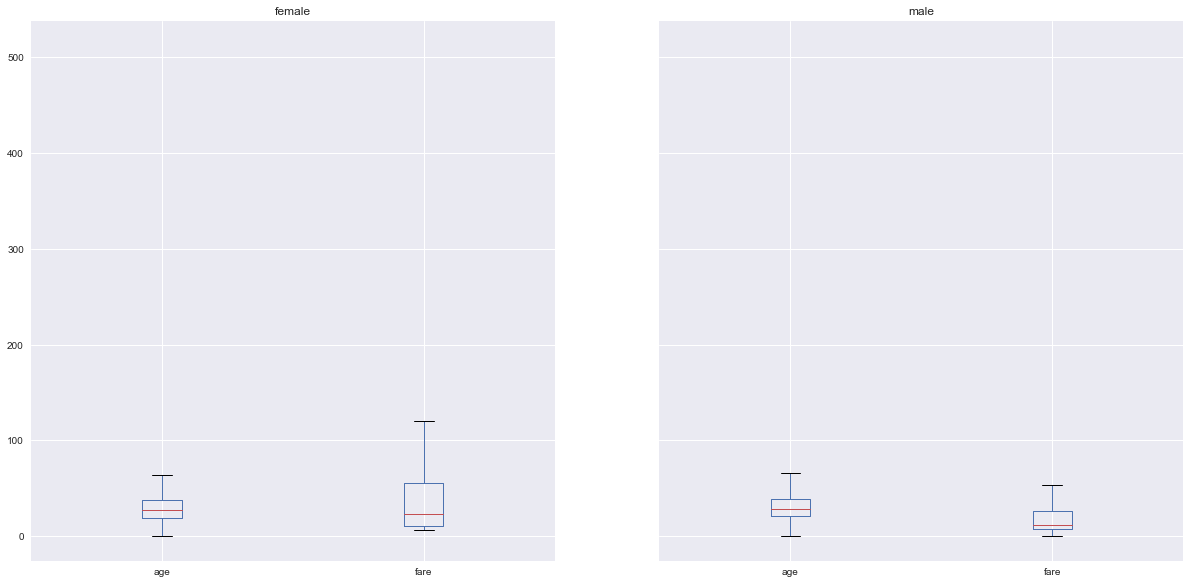

In [163]:
groupby_gender = titanic_train.groupby('sex') 
groupby_gender.mean()

groupby_gender.boxplot(column=['age', 'fare'],figsize=(20,10), grid=True)

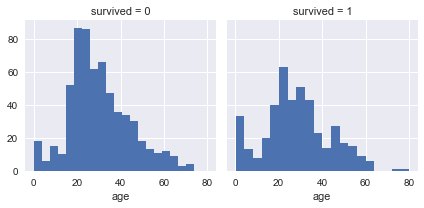

In [164]:
grid1 = seaborn.FacetGrid(titanic_train, col='survived')
grid1.map(pplot.hist, 'age', bins=20)

#Infants (Age <=4) had high survival rate.
#Oldest passengers (Age = 80) survived.
#Large number of 15-25 year olds did not survive.
#Most passengers are in 15-35 age range.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029B25FBE2B0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000029B261D95F8>]], dtype=object)

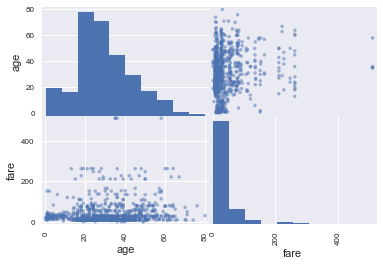

In [165]:
from pandas.plotting import scatter_matrix
scatter_matrix(titanic_train[['age', 'fare']])

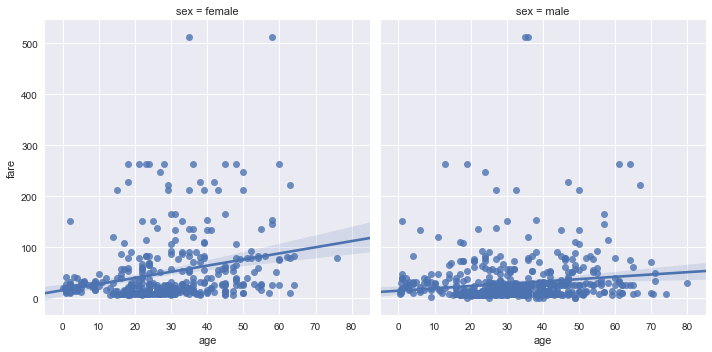

In [166]:
seaborn.lmplot(y='fare', x='age', data=titanic_train, col='sex')

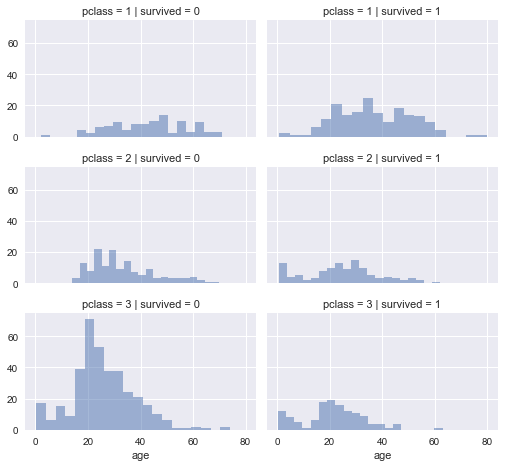

In [167]:
grid2 = seaborn.FacetGrid(titanic_train, col='survived', row='pclass', size=2.2, aspect=1.6)
grid2.map(pplot.hist, 'age', alpha=.5, bins=20)
grid2.add_legend();

#Pclass=3 had most passengers, however most did not survive.
#Infant passengers in Pclass=2 and Pclass=3 mostly survived. 
#Most passengers in Pclass=1 survived. In Pclass=1 Oldest passengers (Age = 80)that survived.
#Pclass varies in terms of Age distribution of passengers.

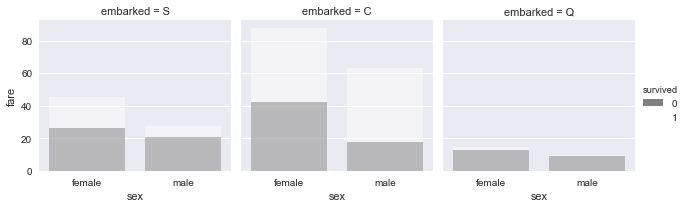

In [168]:
grid3 = seaborn.FacetGrid(titanic_train, col='embarked', hue='survived', palette={0: 'k', 1: 'w'})
grid3.map(seaborn.barplot, 'sex', 'fare', alpha=.5, ci=None)
grid3.add_legend()

#Higher fare paying passengers had better survival. 
#Port of embarkation correlates with survival rates. 

In [169]:
for dataset in titanic_set:
    dataset['title'] = dataset.name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(titanic_train['title'], titanic_train['sex'])

sex,female,male
title,,
Capt,0,1
Col,0,4
Countess,1,0
Don,0,1
Dona,1,0
Dr,1,7
Jonkheer,0,1
Lady,1,0
Major,0,2


In [170]:
for dataset in titanic_set:
    dataset['title'] = dataset['title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer','Dona'], 'Rare')

    dataset['title'] = dataset['title'].replace('Mlle', 'Miss')
    dataset['title'] = dataset['title'].replace('Ms', 'Miss')
    dataset['title'] = dataset['title'].replace('Mme', 'Mrs')
    
titanic_train[['title', 'survived']].groupby(['title'], as_index=False).mean()

,title,survived
0,Master,0.508197
1,Miss,0.678030
2,Mr,0.162483
3,Mrs,0.787879
4,Rare,0.379310


In [171]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
title_mapping2 = {"female": 1, "male": 0}
for dataset in titanic_set:
    dataset['title'] = dataset['title'].map(title_mapping)
    dataset['title'] = dataset['title'].fillna(0)
    dataset['sex'] = dataset['sex'].map(title_mapping2)

In [172]:
titanic_train.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,1,2
1,1,1,"Allison, Master. Hudson Trevor",0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,1,4
2,1,0,"Allison, Miss. Helen Loraine",1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,1,2
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,1,1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,1,3


In [173]:
titanic_train = titanic_train.drop(['name'], axis=1)
titanic_test = titanic_test.drop(['name'], axis=1)
titanic_set = [titanic_train, titanic_test]
titanic_train.shape, titanic_test.shape

((1309, 14), (600, 13))

In [174]:
titanic_train.head()


,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,1,29.0000,0,0,24160,211.3375,B5,S,2,NaN,1,2
1,1,1,0,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,1,4
2,1,0,1,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,1,2
3,1,0,0,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,1,1
4,1,0,1,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,1,3


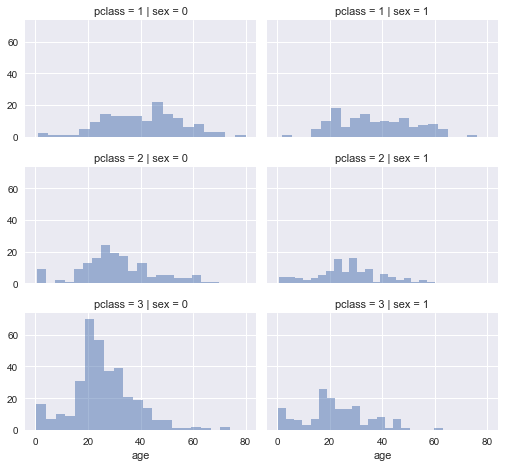

In [175]:
grid6 = seaborn.FacetGrid(titanic_train, row='pclass', col='sex', size=2.2, aspect=1.6)
grid6.map(pplot.hist, 'age', alpha=.5, bins=20)
grid6.add_legend()
# sex: "1"- female, "0"-male

In [176]:
for dataset in titanic_set:    
    dataset.loc[ dataset['age'] <= 10, 'age'] = 0
    dataset.loc[(dataset['age'] > 10) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 40), 'age'] = 2
    dataset.loc[(dataset['age'] > 40) & (dataset['age'] <= 65), 'age'] = 3
    dataset.loc[ dataset['age'] > 65, 'age']=4
titanic_train.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,1,2.0,0,0,24160,211.3375,B5,S,2,NaN,1,2
1,1,1,0,0.0,1,2,113781,151.5500,C22 C26,S,11,NaN,1,4
2,1,0,1,0.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,1,2
3,1,0,0,2.0,1,2,113781,151.5500,C22 C26,S,NaN,135.0,1,1
4,1,0,1,2.0,1,2,113781,151.5500,C22 C26,S,NaN,NaN,1,3


In [177]:
for dataset in titanic_set:
    dataset['embarked'] = dataset['embarked'].fillna(titanic_train.embarked.dropna().mode()[0])
    
titanic_train[['embarked', 'survived']].groupby(['embarked'], as_index=False).mean().sort_values(by='survived', ascending=False)

,embarked,survived
0,C,0.555556
1,Q,0.357724
2,S,0.334061


In [178]:
for dataset in titanic_set:
    dataset['embarked'] = dataset['embarked'].map( {'S': 0, 'C': 1, 'Q': 2} )
titanic_train.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,1,2.0,0,0,24160,211.3375,B5,0,2,NaN,1,2
1,1,1,0,0.0,1,2,113781,151.5500,C22 C26,0,11,NaN,1,4
2,1,0,1,0.0,1,2,113781,151.5500,C22 C26,0,NaN,NaN,1,2
3,1,0,0,2.0,1,2,113781,151.5500,C22 C26,0,NaN,135.0,1,1
4,1,0,1,2.0,1,2,113781,151.5500,C22 C26,0,NaN,NaN,1,3


In [179]:
titanic_test['fare'].fillna(titanic_test['fare'].dropna().median(), inplace=True)
titanic_test.head()

,pclass,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,2.0,0,0,24160,211.3375,B5,0,2,NaN,1,2
1,1,0,0.0,1,2,113781,151.5500,C22 C26,0,11,NaN,1,4
2,1,1,0.0,1,2,113781,151.5500,C22 C26,0,NaN,NaN,1,2
3,1,0,2.0,1,2,113781,151.5500,C22 C26,0,NaN,135.0,1,1
4,1,1,2.0,1,2,113781,151.5500,C22 C26,0,NaN,NaN,1,3


In [180]:
titanic_train['FareRange'] = pd.qcut(titanic_train['fare'], 4)
titanic_train[['FareRange', 'survived']].groupby(['FareRange'], as_index=False).mean().sort_values(by='FareRange', ascending=True)

,FareRange,survived
0,"(-0.001, 7.896]",0.228487
1,"(7.896, 14.454]",0.284375
2,"(14.454, 31.275]",0.435976
3,"(31.275, 512.329]",0.585139


In [181]:
for dataset in titanic_set:
    dataset.loc[ dataset['fare'] <= 7.896, 'fare'] = 0
    dataset.loc[(dataset['fare'] > 7.896) & (dataset['fare'] <= 14.454), 'fare'] = 1
    dataset.loc[(dataset['fare'] > 14.454) & (dataset['fare'] <= 31.275), 'fare']   = 2
    dataset.loc[ dataset['fare'] > 31.275, 'fare'] = 3

    


In [182]:
titanic_train.head(10)

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,FareRange
0,1,1,1,2.0,0,0,24160,3.0,B5,0,2,NaN,1,2,"(31.275, 512.329]"
1,1,1,0,0.0,1,2,113781,3.0,C22 C26,0,11,NaN,1,4,"(31.275, 512.329]"
2,1,0,1,0.0,1,2,113781,3.0,C22 C26,0,NaN,NaN,1,2,"(31.275, 512.329]"
3,1,0,0,2.0,1,2,113781,3.0,C22 C26,0,NaN,135.0,1,1,"(31.275, 512.329]"
4,1,0,1,2.0,1,2,113781,3.0,C22 C26,0,NaN,NaN,1,3,"(31.275, 512.329]"
5,1,1,0,3.0,0,0,19952,2.0,E12,0,3,NaN,0,1,"(14.454, 31.275]"
6,1,1,1,3.0,1,0,13502,3.0,D7,0,10,NaN,1,2,"(31.275, 512.329]"
7,1,0,0,2.0,0,0,112050,0.0,A36,0,NaN,NaN,1,1,"(-0.001, 7.896]"
8,1,1,1,3.0,2,0,11769,3.0,C101,0,D,NaN,1,3,"(31.275, 512.329]"
9,1,0,0,4.0,0,0,PC 17609,3.0,NaN,1,NaN,22.0,1,1,"(31.275, 512.329]"


In [183]:
titanic_train = titanic_train.drop(['ticket'], axis=1)
titanic_train = titanic_train.drop(['body'], axis=1)
titanic_train = titanic_train.drop(['boat'], axis=1)
titanic_train = titanic_train.drop(['FareRange'], axis=1)
titanic_test = titanic_test.drop(['ticket'], axis=1)
titanic_test = titanic_test.drop(['body'], axis=1)
titanic_test = titanic_test.drop(['boat'], axis=1)


In [184]:
titanic_train.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,home.dest,title
0,1,1,1,2.0,0,0,3.0,B5,0,1,2
1,1,1,0,0.0,1,2,3.0,C22 C26,0,1,4
2,1,0,1,0.0,1,2,3.0,C22 C26,0,1,2
3,1,0,0,2.0,1,2,3.0,C22 C26,0,1,1
4,1,0,1,2.0,1,2,3.0,C22 C26,0,1,3
5,1,1,0,3.0,0,0,2.0,E12,0,0,1
6,1,1,1,3.0,1,0,3.0,D7,0,1,2
7,1,0,0,2.0,0,0,0.0,A36,0,1,1
8,1,1,1,3.0,2,0,3.0,C101,0,1,3
9,1,0,0,4.0,0,0,3.0,NaN,1,1,1


In [185]:
titanic_test.head(10)

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,home.dest,title
0,1,1,2.0,0,0,3.0,B5,0,1,2
1,1,0,0.0,1,2,3.0,C22 C26,0,1,4
2,1,1,0.0,1,2,3.0,C22 C26,0,1,2
3,1,0,2.0,1,2,3.0,C22 C26,0,1,1
4,1,1,2.0,1,2,3.0,C22 C26,0,1,3
5,1,0,3.0,0,0,2.0,E12,0,0,1
6,1,1,3.0,1,0,3.0,D7,0,1,2
7,1,0,2.0,0,0,0.0,A36,0,1,1
8,1,1,3.0,2,0,3.0,C101,0,1,3
9,1,0,4.0,0,0,3.0,NaN,1,1,1


In [186]:
titanic_test = titanic_test.drop(['cabin'], axis=1)
titanic_train = titanic_train.drop(['cabin'], axis=1)


In [187]:
titanic_train=titanic_train[pd.notnull(titanic_train['age'])]
titanic_test=titanic_test[pd.notnull(titanic_test['age'])]
titanic_train=titanic_train[pd.notnull(titanic_train['fare'])]
titanic_test=titanic_test[pd.notnull(titanic_test['fare'])]

Model, prediction and solution


In [188]:
X_train = titanic_train.drop("survived", axis=1).copy()
Y_train = titanic_train["survived"]
X_test  = titanic_test.copy()
X_train.shape, Y_train.shape, X_test.shape

((1045, 9), (1045,), (545, 9))

In [189]:
#REGRESSION  V V V 
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
pred_log = round(logreg.score(X_train, Y_train) * 100, 2)
pred_log

80.959999999999994

In [190]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
pred_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
pred_linear_svc

80.290000000000006

In [191]:
coeff= pd.DataFrame(titanic_train.columns.delete(0))
coeff.columns = ['Feature']
coeff["Correlation"] = pd.Series(logreg.coef_[0])

coeff.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,sex,2.116555
8,title,0.425154
5,fare,0.105544
6,embarked,0.100583
4,parch,-0.087494
7,home.dest,-0.116538
3,sibsp,-0.456988
2,age,-0.534137
0,survived,-0.874967


In [192]:
# Support Vector Machines  

svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
pred_svc = round(svc.score(X_train, Y_train) * 100, 2)
pred_svc

82.010000000000005

In [193]:
# K NEAREST Neighbors
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
pred_knn = round(knn.score(X_train, Y_train) * 100, 2)
pred_knn

83.920000000000002

In [194]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
pred_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
pred_gaussian

78.849999999999994

In [195]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
pred_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
pred_decision_tree

88.040000000000006

Best prediction score:  88.040000000000006 by Decision Tree